# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

# To do: 變項的分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將資料依照歲數, 將 20 到 70 歲切成11個區間? (In[4], Hint : 使用 numpy.linspace),  
  送入繪圖前的除了排序外, 還要注意什麼? (In[5])
- 如何調整對應資料, 以繪製長條圖(bar chart)? (In[7])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline
plt.style.use('ggplot')

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
#將app_train['DAYS_BIRTH']內之資料取決對質後，取代app_train['DAYS_BIRTH']內資料
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [5]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

#自 20 到 70 歲，切 11 個區間 
#在包含起點與終點情形下，需切出12個點--->num=12
bin_cut =  11
age_data['YEARS_BINNED2'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut) 

# 顯示不同組的數量
print(age_data['YEARS_BINNED2'].value_counts())  #計算每個區間的數值個數
age_data.head()

(38.192, 42.61]     38108
(33.773, 38.192]    36195
(29.355, 33.773]    35088
(42.61, 47.028]     34019
(51.447, 55.865]    31287
(47.028, 51.447]    29772
(55.865, 60.284]    29229
(24.936, 29.355]    28156
(60.284, 64.702]    24079
(20.469, 24.936]    11860
(64.702, 69.121]     9718
Name: YEARS_BINNED2, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED2
0,1,9461,25.920548,"(24.936, 29.355]"
1,0,16765,45.931507,"(42.61, 47.028]"
2,0,19046,52.180822,"(51.447, 55.865]"
3,0,19005,52.068493,"(51.447, 55.865]"
4,0,19932,54.608219,"(51.447, 55.865]"


In [7]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

#自 20 到 70 歲，切 11 個區間 
#在包含起點與終點情形下，需切出12個點--->num=12
bin_cut =  np.linspace(20, 70, num=12)
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut) 

# 顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())  #計算每個區間的數值個數
age_data.head()

(38.182, 42.727]    39155
(33.636, 38.182]    37238
(29.091, 33.636]    35954
(42.727, 47.273]    34796
(51.818, 56.364]    32025
(47.273, 51.818]    30586
(56.364, 60.909]    29832
(24.545, 29.091]    27723
(60.909, 65.455]    23291
(20.0, 24.545]      10324
(65.455, 70.0]       6587
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(24.545, 29.091]"
1,0,16765,45.931507,"(42.727, 47.273]"
2,0,19046,52.180822,"(51.818, 56.364]"
3,0,19005,52.068493,"(51.818, 56.364]"
4,0,19932,54.608219,"(51.818, 56.364]"


In [8]:
year_group_sorted_df =  age_data.sort_index(by=['YEARS_BINNED'])
year_group_sorted_df 

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
182477,0,8479,23.230137,"(20.0, 24.545]"
31585,0,8450,23.150685,"(20.0, 24.545]"
253372,1,8389,22.983562,"(20.0, 24.545]"
48615,0,8580,23.506849,"(20.0, 24.545]"
48614,0,8073,22.117808,"(20.0, 24.545]"
289850,1,8368,22.926027,"(20.0, 24.545]"
106022,0,8546,23.413699,"(20.0, 24.545]"
21191,1,8412,23.046575,"(20.0, 24.545]"
7674,0,8563,23.460274,"(20.0, 24.545]"
168997,0,8676,23.769863,"(20.0, 24.545]"


In [9]:
year_group_sorted_df.YEARS_BINNED.unique() 

[(20.0, 24.545], (24.545, 29.091], (29.091, 33.636], (33.636, 38.182], (38.182, 42.727], ..., (47.273, 51.818], (51.818, 56.364], (56.364, 60.909], (60.909, 65.455], (65.455, 70.0]]
Length: 11
Categories (11, interval[float64]): [(20.0, 24.545] < (24.545, 29.091] < (29.091, 33.636] < (33.636, 38.182] ... (51.818, 56.364] < (56.364, 60.909] < (60.909, 65.455] < (65.455, 70.0]]

In [10]:
"""
##https://codeday.me/bug/20171128/102737.html
np.unique(df[['Col1', 'Col2']])
或
np.unique(df[['Col1', 'Col2']].values)
或
pd.unique(df[['Col1', 'Col2']].values.ravel())
"""

np.unique(year_group_sorted_df['YEARS_BINNED'].values) 

array([Interval(20.0, 24.545, closed='right'),
       Interval(24.545, 29.091, closed='right'),
       Interval(29.091, 33.636, closed='right'),
       Interval(33.636, 38.182, closed='right'),
       Interval(38.182, 42.727, closed='right'),
       Interval(42.727, 47.273, closed='right'),
       Interval(47.273, 51.818, closed='right'),
       Interval(51.818, 56.364, closed='right'),
       Interval(56.364, 60.909, closed='right'),
       Interval(60.909, 65.455, closed='right'),
       Interval(65.455, 70.0, closed='right')], dtype=object)

In [11]:
np.unique(year_group_sorted_df['YEARS_BINNED']) 

array([Interval(20.0, 24.545, closed='right'),
       Interval(24.545, 29.091, closed='right'),
       Interval(29.091, 33.636, closed='right'),
       Interval(33.636, 38.182, closed='right'),
       Interval(38.182, 42.727, closed='right'),
       Interval(42.727, 47.273, closed='right'),
       Interval(47.273, 51.818, closed='right'),
       Interval(51.818, 56.364, closed='right'),
       Interval(56.364, 60.909, closed='right'),
       Interval(60.909, 65.455, closed='right'),
       Interval(65.455, 70.0, closed='right')], dtype=object)

In [12]:
pd.unique(year_group_sorted_df['YEARS_BINNED'].values.ravel())

array([Interval(20.0, 24.545, closed='right'),
       Interval(24.545, 29.091, closed='right'),
       Interval(29.091, 33.636, closed='right'),
       Interval(33.636, 38.182, closed='right'),
       Interval(38.182, 42.727, closed='right'),
       Interval(42.727, 47.273, closed='right'),
       Interval(47.273, 51.818, closed='right'),
       Interval(51.818, 56.364, closed='right'),
       Interval(56.364, 60.909, closed='right'),
       Interval(60.909, 65.455, closed='right'),
       Interval(65.455, 70.0, closed='right')], dtype=object)

In [13]:
#year_group_sorted會是11種區間
#利用==，判斷age_data['YEARS_BINNED']每一個區間是否會是第0個區間year_group_sorted[0] 
#結果是一連串的布林T或F
year_group_sorted=np.unique(year_group_sorted_df['YEARS_BINNED'].values) 
age_data['YEARS_BINNED'] == year_group_sorted[0] 

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15         True
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
307481    False
307482    False
307483    False
307484    False
307485    False
307486    False
307487    False
307488    False
307489    False
307490    False
307491    False
307492    False
307493    False
307494    False
307495    False
307496    False
307497    False
307498    False
307499    False
307500    False
307501    False
307502    False
307503    False
307504    False
307505    False
307506    False
307507    False
307508    False
307509    False
307510    False
Name: YEARS_BINNED, Leng

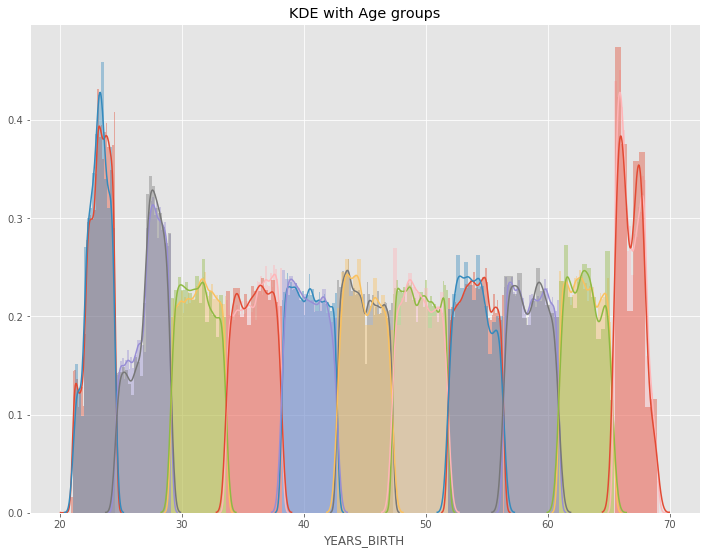

In [15]:
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
year_group_sorted_df =  age_data.sort_index(by=['YEARS_BINNED'])
year_group_sorted=np.unique(year_group_sorted_df['YEARS_BINNED'].values) 


#python一行写不下，变多行--->\和（） 两种方法
#https://blog.csdn.net/longshenlmj/article/details/9838377

"""
布林數在dataframe.loc[]之中，亦即，
dataframe.df[布林]
會剩下布林數為true的row
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
"""
plt.figure(figsize=(12,9))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

In [16]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 24.545]",0.125533,8441.910403,23.128522
"(24.545, 29.091]",0.110883,9922.569852,27.185123
"(29.091, 33.636]",0.105412,11452.464955,31.376616
"(33.636, 38.182]",0.094688,13134.523068,35.984995
"(38.182, 42.727]",0.081394,14754.175278,40.422398
"(42.727, 47.273]",0.076589,16400.977411,44.934185
"(47.273, 51.818]",0.071896,18074.292094,49.518608
"(51.818, 56.364]",0.063107,19740.133021,54.082556
"(56.364, 60.909]",0.053701,21389.693517,58.601900


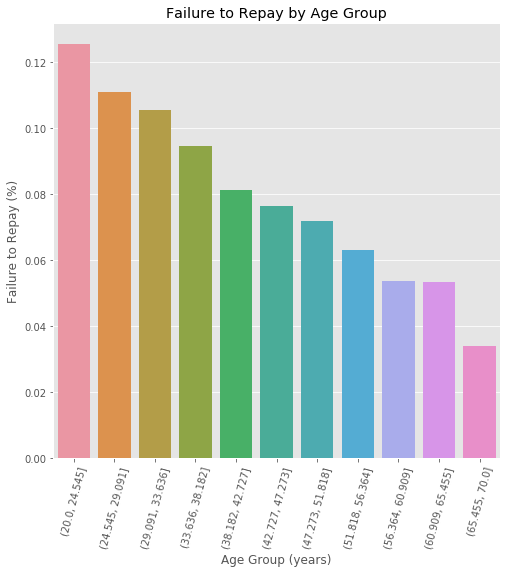

In [17]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
px = age_groups.index
py = age_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');